In [28]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [29]:
#Norfolk
#url= 'https://data.norfolk.gov/resource/vfm4-5wv6.json'

# Make request and store response
#response = requests.get(url)

# Storing the JSON response within a variable
#norfolk_data = response.json()
# Use json.dumps to print the json
#print(json.dumps(norfolk_data, indent=4, sort_keys=True))

# Convert to DataFrame
#norfolk_df = pd.DataFrame(norfolk_data)

In [30]:
# Check link for csv file: https://data.norfolk.gov/Government/Norfolk-Animal-Care-and-Adoption-Center-NACC-/vfm4-5wv6
adoption= "Norfolk_Animal.csv"
adoption= pd.read_csv(adoption)
adoption.head()
adoption.shape
#adoption.dtypes

(29276, 21)

In [31]:
#Converting Intake Date and Outcome Date to pandas date format
adoption['Intake Date'] = pd.to_datetime(adoption['Intake Date'],format='%m/%d/%Y')
adoption['Outcome Date'] = pd.to_datetime(adoption['Outcome Date'],format='%m/%d/%Y')

#adoption.shape
#adoption.dtypes
adoption

,Animal ID,Animal Name,Animal Type,Sex,Years Old,Months Old,Primary Breed,Primary Color,Tag Number,Intake Date,...,Intake Subtype,Outcome Type,Outcome Subtype,Outcome Date,Intake Month,Intake Day of the Week,Intake Year,Outcome Month,Outcome Day of the Week,Outcome Year
0,A000455,SNOWBALL,Dog,Neutered Male,4.0,0.00,POODLE MIN,WHITE,L17-011989,2017-08-16,...,Over the Counter,Adoption,Walk-In,2017-08-19,NaN,NaN,NaN,NaN,NaN,NaN
1,A000455,SNOWBALL,Dog,Neutered Male,4.0,0.00,POODLE MIN,WHITE,L17-011502,2017-05-03,...,Over the Counter,Adoption,Walk-In,2017-05-13,NaN,NaN,NaN,NaN,NaN,NaN
2,A000601,SHEILA E,Cat,Spayed Female,0.0,1.80,DOMESTIC SH,CALICO,L16-010051,2016-08-20,...,Transfer,Adoption,Website Information,2016-10-02,NaN,NaN,NaN,NaN,NaN,NaN
3,A001474,CHARLES,Dog,Neutered Male,1.0,0.00,LABRADOR RETR,YELLOW,NaN,2017-04-27,...,Over the Counter,Return to Owner,Walk-In,2017-06-06,NaN,NaN,NaN,NaN,NaN,NaN
4,A001474,CHARLES,Dog,Neutered Male,1.0,0.00,LABRADOR RETR,YELLOW,L16-009301,2016-03-30,...,Animal Cruelty,Return to Owner,NaN,2016-04-15,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29271,A059219,OZZY,Dog,Male,NaN,NaN,MASTIFF,RED,981020039165640,2020-11-22,...,Over the Counter,Adoption,Walk-In,2020-11-25,NaN,NaN,NaN,NaN,NaN,NaN
29272,A059228,NaN,Cat,Neutered Male,8.0,NaN,DOMESTIC SH,ORG TABBY,NaN,2020-11-23,...,Animal Cruelty,Disposal of Deceased Pet,NaN,2020-11-23,NaN,NaN,NaN,NaN,NaN,NaN
29273,A059254,NaN,Cat,Female,NaN,1.85,DOMESTIC SH,ORG TABBY,NaN,2020-11-27,...,Animal Control,Foster,Underage or Underweight,2020-11-30,NaN,NaN,NaN,NaN,NaN,NaN
29274,A059260,CHOCOLATE,Dog,Male,2.0,NaN,POODLE TOY,BROWN,985112001208056,2020-11-29,...,Animal Control,Return to Owner,Walk-In,2020-11-29,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#Pulling only the columns with outcome type as adoption
adoption= adoption.loc[adoption['Outcome Type'] == 'Adoption']
adoption
#adoption.dtypes

,Animal ID,Animal Name,Animal Type,Sex,Years Old,Months Old,Primary Breed,Primary Color,Tag Number,Intake Date,...,Intake Subtype,Outcome Type,Outcome Subtype,Outcome Date,Intake Month,Intake Day of the Week,Intake Year,Outcome Month,Outcome Day of the Week,Outcome Year
0,A000455,SNOWBALL,Dog,Neutered Male,4.0,0.0,POODLE MIN,WHITE,L17-011989,2017-08-16,...,Over the Counter,Adoption,Walk-In,2017-08-19,NaN,NaN,NaN,NaN,NaN,NaN
1,A000455,SNOWBALL,Dog,Neutered Male,4.0,0.0,POODLE MIN,WHITE,L17-011502,2017-05-03,...,Over the Counter,Adoption,Walk-In,2017-05-13,NaN,NaN,NaN,NaN,NaN,NaN
2,A000601,SHEILA E,Cat,Spayed Female,0.0,1.8,DOMESTIC SH,CALICO,L16-010051,2016-08-20,...,Transfer,Adoption,Website Information,2016-10-02,NaN,NaN,NaN,NaN,NaN,NaN
17,A002987,ENZO,Dog,Neutered Male,1.0,0.0,PIT BULL,BLACK,L17-011517,2017-04-30,...,Over the Counter,Adoption,Walk-In,2017-05-16,NaN,NaN,NaN,NaN,NaN,NaN
28,A006357,SKIPPY,Dog,Neutered Male,5.0,0.0,BEAGLE,TRICOLOR,982000123128327,2016-05-03,...,Over the Counter,Adoption,NaN,2016-05-18,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29257,A059140,SARAH,Cat,Neutered Male,1.0,4.0,DOMESTIC SH,BRN TABBY,982126056569270,2020-11-14,...,Transfer,Adoption,Walk-In,2020-11-16,NaN,NaN,NaN,NaN,NaN,NaN
29258,A059142,NaN,Dog,Male,NaN,6.0,GERM SHEPHERD,TAN,981020039171781,2020-11-14,...,Animal Control,Adoption,NaN,2020-11-28,NaN,NaN,NaN,NaN,NaN,NaN
29265,A059175,NaN,Dog,Spayed Female,1.0,NaN,PIT BULL,BR BRINDLE,981020039180182,2020-11-19,...,Animal Control,Adoption,Walk-In,2020-11-25,NaN,NaN,NaN,NaN,NaN,NaN
29270,A059217,DODGE,Dog,Male,NaN,1.9,PIT BULL,TAN,981020039180052,2020-11-21,...,Animal Control,Adoption,Website Information,2020-11-27,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#Adding outcome month and outcome year as additional columns
adoption['Outcome Month'] = adoption['Outcome Date'].map(lambda x: x.strftime('%m'))
adoption['Outcome Year'] = adoption['Outcome Date'].map(lambda x: x.strftime('%Y'))
adoption

,Animal ID,Animal Name,Animal Type,Sex,Years Old,Months Old,Primary Breed,Primary Color,Tag Number,Intake Date,...,Intake Subtype,Outcome Type,Outcome Subtype,Outcome Date,Intake Month,Intake Day of the Week,Intake Year,Outcome Month,Outcome Day of the Week,Outcome Year
0,A000455,SNOWBALL,Dog,Neutered Male,4.0,0.0,POODLE MIN,WHITE,L17-011989,2017-08-16,...,Over the Counter,Adoption,Walk-In,2017-08-19,NaN,NaN,NaN,08,NaN,2017
1,A000455,SNOWBALL,Dog,Neutered Male,4.0,0.0,POODLE MIN,WHITE,L17-011502,2017-05-03,...,Over the Counter,Adoption,Walk-In,2017-05-13,NaN,NaN,NaN,05,NaN,2017
2,A000601,SHEILA E,Cat,Spayed Female,0.0,1.8,DOMESTIC SH,CALICO,L16-010051,2016-08-20,...,Transfer,Adoption,Website Information,2016-10-02,NaN,NaN,NaN,10,NaN,2016
17,A002987,ENZO,Dog,Neutered Male,1.0,0.0,PIT BULL,BLACK,L17-011517,2017-04-30,...,Over the Counter,Adoption,Walk-In,2017-05-16,NaN,NaN,NaN,05,NaN,2017
28,A006357,SKIPPY,Dog,Neutered Male,5.0,0.0,BEAGLE,TRICOLOR,982000123128327,2016-05-03,...,Over the Counter,Adoption,NaN,2016-05-18,NaN,NaN,NaN,05,NaN,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29257,A059140,SARAH,Cat,Neutered Male,1.0,4.0,DOMESTIC SH,BRN TABBY,982126056569270,2020-11-14,...,Transfer,Adoption,Walk-In,2020-11-16,NaN,NaN,NaN,11,NaN,2020
29258,A059142,NaN,Dog,Male,NaN,6.0,GERM SHEPHERD,TAN,981020039171781,2020-11-14,...,Animal Control,Adoption,NaN,2020-11-28,NaN,NaN,NaN,11,NaN,2020
29265,A059175,NaN,Dog,Spayed Female,1.0,NaN,PIT BULL,BR BRINDLE,981020039180182,2020-11-19,...,Animal Control,Adoption,Walk-In,2020-11-25,NaN,NaN,NaN,11,NaN,2020
29270,A059217,DODGE,Dog,Male,NaN,1.9,PIT BULL,TAN,981020039180052,2020-11-21,...,Animal Control,Adoption,Website Information,2020-11-27,NaN,NaN,NaN,11,NaN,2020


In [34]:
#Pulling out only the columns relevant for our research
norfolk_df= adoption[["Animal ID","Animal Type","Sex", "Years Old","Months Old","Primary Breed", "Primary Color","Intake Type","Intake Date","Outcome Type","Outcome Date","Outcome Month","Outcome Year"]]
norfolk_df

,Animal ID,Animal Type,Sex,Years Old,Months Old,Primary Breed,Primary Color,Intake Type,Intake Date,Outcome Type,Outcome Date,Outcome Month,Outcome Year
0,A000455,Dog,Neutered Male,4.0,0.0,POODLE MIN,WHITE,Return,2017-08-16,Adoption,2017-08-19,08,2017
1,A000455,Dog,Neutered Male,4.0,0.0,POODLE MIN,WHITE,Owner Surrendered,2017-05-03,Adoption,2017-05-13,05,2017
2,A000601,Cat,Spayed Female,0.0,1.8,DOMESTIC SH,CALICO,Transfer,2016-08-20,Adoption,2016-10-02,10,2016
17,A002987,Dog,Neutered Male,1.0,0.0,PIT BULL,BLACK,Stray,2017-04-30,Adoption,2017-05-16,05,2017
28,A006357,Dog,Neutered Male,5.0,0.0,BEAGLE,TRICOLOR,Owner Surrendered,2016-05-03,Adoption,2016-05-18,05,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29257,A059140,Cat,Neutered Male,1.0,4.0,DOMESTIC SH,BRN TABBY,Transfer,2020-11-14,Adoption,2020-11-16,11,2020
29258,A059142,Dog,Male,NaN,6.0,GERM SHEPHERD,TAN,Stray,2020-11-14,Adoption,2020-11-28,11,2020
29265,A059175,Dog,Spayed Female,1.0,NaN,PIT BULL,BR BRINDLE,Stray,2020-11-19,Adoption,2020-11-25,11,2020
29270,A059217,Dog,Male,NaN,1.9,PIT BULL,TAN,Stray,2020-11-21,Adoption,2020-11-27,11,2020


In [35]:
# URL for GET requests to retrieve COVID data for Norfolk, VA
url = "https://data.virginia.gov/resource/bre9-aqqr.json?locality=Norfolk"
#url = "https://data.virginia.gov/resource/bre9-aqqr.json"

response = requests.get(url)

# Print status code
print(response.status_code)

200


In [36]:
# Retrieving data and converting it into JSON
requests.get(url).json()

data = response.json()
#print(json.dumps(data, indent=4))

In [37]:
# Create df 
COVID_df = pd.DataFrame(data)
COVID_df

,report_date,fips,locality,vdh_health_district,total_cases,hospitalizations,deaths
0,2020-12-12T00:00:00.000,51710,Norfolk,Norfolk,7331,509,99
1,2020-12-11T00:00:00.000,51710,Norfolk,Norfolk,7250,502,99
2,2020-12-10T00:00:00.000,51710,Norfolk,Norfolk,7176,503,99
3,2020-12-09T00:00:00.000,51710,Norfolk,Norfolk,7106,490,98
4,2020-12-08T00:00:00.000,51710,Norfolk,Norfolk,7038,483,98
...,...,...,...,...,...,...,...
266,2020-11-23T00:00:00.000,51710,Norfolk,Norfolk,6297,439,88
267,2020-11-24T00:00:00.000,51710,Norfolk,Norfolk,6344,442,89
268,2020-11-25T00:00:00.000,51710,Norfolk,Norfolk,6378,456,89
269,2020-11-26T00:00:00.000,51710,Norfolk,Norfolk,6401,457,89


Analyze the adoption data:

In [38]:
norfolk_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 29271
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Animal ID      10842 non-null  object        
 1   Animal Type    10842 non-null  object        
 2   Sex            10842 non-null  object        
 3   Years Old      6640 non-null   float64       
 4   Months Old     6799 non-null   float64       
 5   Primary Breed  10842 non-null  object        
 6   Primary Color  10842 non-null  object        
 7   Intake Type    10842 non-null  object        
 8   Intake Date    10842 non-null  datetime64[ns]
 9   Outcome Type   10842 non-null  object        
 10  Outcome Date   10842 non-null  datetime64[ns]
 11  Outcome Month  10842 non-null  object        
 12  Outcome Year   10842 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 1.2+ MB


In [39]:
#year_group = norfolk_df.groupby('Outcome Year')
group= norfolk_df.groupby(['Outcome Year'])

year= group.count()
year


#plt.plot(norfolk_df['Outcome Month'], norfolk_df['Outcome Type'])

,Animal ID,Animal Type,Sex,Years Old,Months Old,Primary Breed,Primary Color,Intake Type,Intake Date,Outcome Type,Outcome Date,Outcome Month
Outcome Year,,,,,,,,,,,,
2015,223,223,223,223,223,223,223,223,223,223,223,223
2016,2391,2391,2391,2391,2390,2391,2391,2391,2391,2391,2391,2391
2017,2240,2240,2240,1214,1208,2240,2240,2240,2240,2240,2240,2240
2018,2195,2195,2195,1045,1088,2195,2195,2195,2195,2195,2195,2195
2019,2239,2239,2239,1010,1160,2239,2239,2239,2239,2239,2239,2239
2020,1554,1554,1554,757,730,1554,1554,1554,1554,1554,1554,1554


In [40]:
year1_df = norfolk_df.loc[norfolk_df['Outcome Year'] == '2018']
year1_adoptions = year1_df["Outcome Month"].value_counts()
year1_adoptions

08    259
12    231
06    211
07    195
05    186
10    185
11    181
03    172
09    161
04    156
02    139
01    119
Name: Outcome Month, dtype: int64

In [41]:
year2_df = norfolk_df.loc[norfolk_df['Outcome Year'] == '2019']
year2_adoptions = year2_df["Outcome Month"].value_counts()
year2_adoptions

08    252
10    250
07    249
06    190
09    189
05    185
11    181
12    174
01    157
04    140
02    136
03    136
Name: Outcome Month, dtype: int64

In [42]:
year3_df = norfolk_df.loc[norfolk_df['Outcome Year'] == '2020']
year3_adoptions = year3_df["Outcome Month"].value_counts()
year3_adoptions

11    186
07    173
01    167
03    164
08    154
02    154
10    154
09    148
06    110
04     80
05     64
Name: Outcome Month, dtype: int64

In [43]:
adoption_by_month = pd.DataFrame({
    "2018": year1_adoptions,
    "2019": year2_adoptions,
    "2020": year3_adoptions
})
adoption_by_month= adoption_by_month.fillna(0)
adoption_by_month

,2018,2019,2020
01,119,157,167.0
02,139,136,154.0
03,172,136,164.0
04,156,140,80.0
05,186,185,64.0
06,211,190,110.0
07,195,249,173.0
08,259,252,154.0
09,161,189,148.0
10,185,250,154.0


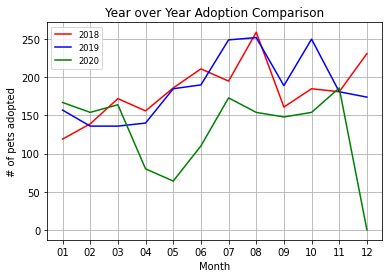

In [44]:
fig = plt.figure()
ax=fig.add_subplot(111)

ax.plot()
ax.plot(adoption_by_month.index,adoption_by_month["2018"],color = 'r',label = '2018')
ax.plot(adoption_by_month.index,adoption_by_month["2019"],color="b", label='2019' )
ax.plot(adoption_by_month.index,adoption_by_month["2020"],color="g", label='2020')
#plt.plot(adoption_by_month['Year'],adoption_by_month['Number of Adoptions'],color="r", marker="o", markersize=7, linestyle="dashed", linewidth=1)

plt.xlabel('Month')
plt.ylabel('# of pets adopted')
plt.title("Year over Year Adoption Comparison")
#plt.legend(handles=('2018', '2019','2020'), loc="best")

plt.legend(loc="best",fontsize="small",fancybox=True)
plt.grid(True)
plt.show()

We notice that adoption rates are decreasing in 2020 compared to previous years.

Analyzing COVID data


In [45]:
#COVID_df.dtypes
COVID_df['Outcome Dates'] = pd.to_datetime(COVID_df['report_date'],format='%Y/%m/%d')

COVID_df['Outcome Month'] = COVID_df['Outcome Dates'].map(lambda x: x.strftime('%m'))
COVID_df

,report_date,fips,locality,vdh_health_district,total_cases,hospitalizations,deaths,Outcome Dates,Outcome Month
0,2020-12-12T00:00:00.000,51710,Norfolk,Norfolk,7331,509,99,2020-12-12,12
1,2020-12-11T00:00:00.000,51710,Norfolk,Norfolk,7250,502,99,2020-12-11,12
2,2020-12-10T00:00:00.000,51710,Norfolk,Norfolk,7176,503,99,2020-12-10,12
3,2020-12-09T00:00:00.000,51710,Norfolk,Norfolk,7106,490,98,2020-12-09,12
4,2020-12-08T00:00:00.000,51710,Norfolk,Norfolk,7038,483,98,2020-12-08,12
...,...,...,...,...,...,...,...,...,...
266,2020-11-23T00:00:00.000,51710,Norfolk,Norfolk,6297,439,88,2020-11-23,11
267,2020-11-24T00:00:00.000,51710,Norfolk,Norfolk,6344,442,89,2020-11-24,11
268,2020-11-25T00:00:00.000,51710,Norfolk,Norfolk,6378,456,89,2020-11-25,11
269,2020-11-26T00:00:00.000,51710,Norfolk,Norfolk,6401,457,89,2020-11-26,11


In [46]:
covid_group = COVID_df.groupby(['Outcome Month'])
covid_max_df=covid_group['total_cases'].max()
covid_max_df


COVID_by_month = pd.DataFrame({
    "# of Cases": covid_max_df
   
})
COVID_by_month

,# of Cases
Outcome Month,
03,8
04,99
05,503
06,915
07,987
08,4394
09,4881
10,5493
11,6528


plot the COVID data

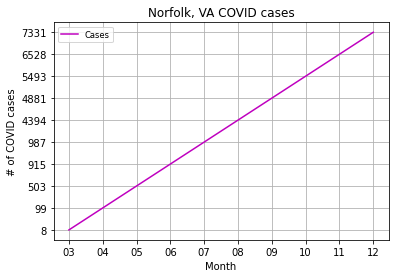

In [47]:

plt.plot(COVID_by_month.index,COVID_by_month['# of Cases'],color = 'm',label = 'Cases')

#['Outcome Month']

plt.xlabel('Month')
plt.ylabel('# of COVID cases')
plt.title("Norfolk, VA COVID cases")

plt.legend(loc="best",fontsize="small",fancybox=True)
plt.grid(True)
plt.show()

plot the delta number of cases month over month

In [48]:
COVID_by_month['# of Cases'] = COVID_by_month['# of Cases'].astype(int)

COVID_diff = COVID_by_month['# of Cases'].diff().fillna(0)

COVID_diff

COVID_per_month = pd.DataFrame({"# of Cases": COVID_diff,
                              "Month": COVID_diff.index})
COVID_per_month

,# of Cases,Month
Outcome Month,,
03,0.0,03
04,91.0,04
05,404.0,05
06,412.0,06
07,72.0,07
08,3407.0,08
09,487.0,09
10,612.0,10
11,1035.0,11


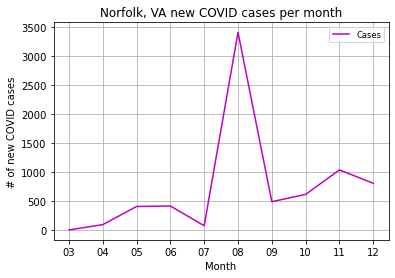

In [49]:
plt.plot(COVID_per_month.index,COVID_per_month['# of Cases'],color = 'm',label = 'Cases')

#['Outcome Month']

plt.xlabel('Month')
plt.ylabel('# of new COVID cases')
plt.title("Norfolk, VA new COVID cases per month")

plt.legend(loc="best",fontsize="small",fancybox=True)
plt.grid(True)
plt.show()


Plot adoption data and COVID cases side-by-side

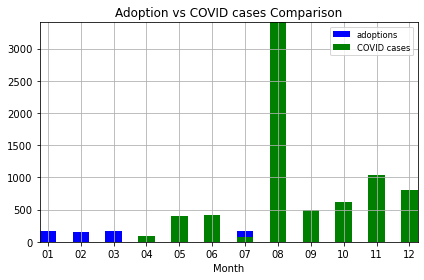

In [50]:
fig = plt.figure()

ax = plt.subplot(111)
ax.bar(adoption_by_month.index,adoption_by_month['2020'], width=0.5, color='b', align='center', label = 'adoptions')
ax.bar(COVID_per_month.index,COVID_per_month['# of Cases'], width=0.5, color='g', align='center',label='COVID cases')
ax.autoscale(tight=True)
plt.xlabel('Month')
#plt.ylabel('# of pets adopted')
plt.title("Adoption vs COVID cases Comparison")
#plt.legend(handles=('2018', '2019','2020'), loc="best")
fig.tight_layout()
plt.legend(loc="best",fontsize="small",fancybox=True)
plt.grid(True)
plt.show()

Plot on a scatter plot covid cases vs pet adoption

In [51]:
new_row = pd.DataFrame({"# of Cases": 0,"Month": "02"},index =[0])

# simply concatenate both dataframes 
COVID_per_month = pd.concat([new_row, COVID_per_month]).reset_index(drop = True) 
new_row = pd.DataFrame({"# of Cases": 0,"Month": "01"},index =[0])

# simply concatenate both dataframes 
COVID_per_month = pd.concat([new_row, COVID_per_month]).reset_index(drop = True) 

COVID_per_month

,# of Cases,Month
0,0.0,01
1,0.0,02
2,0.0,03
3,91.0,04
4,404.0,05
5,412.0,06
6,72.0,07
7,3407.0,08
8,487.0,09
9,612.0,10


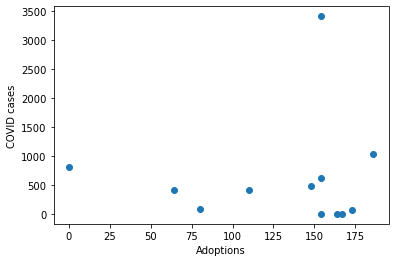

In [52]:
plt.scatter(adoption_by_month['2020'],COVID_per_month['# of Cases'])


plt.xlabel("Adoptions")
plt.ylabel("COVID cases")


plt.show()

Analysis

In [53]:
population1= adoption_by_month['2020'].mean()
population2= COVID_per_month['# of Cases'].mean()

population1_std= np.std(adoption_by_month['2020'])
population2_std= np.std(COVID_per_month['# of Cases'])

population1_std, population2_std

(53.005502858979966, 904.2934742106679)

In [54]:
st.ttest_ind(adoption_by_month['2020'],COVID_per_month['# of Cases'],equal_var= False)

Ttest_indResult(statistic=-1.7601977077903639, pvalue=0.10592615646154367)

With the pvalue of 11.7%, we fail to reject the null hypothesis (there is no correlation between COVID positive cases and pet adoption rates). 

The mean and the standard deviations for population 1 (adoption rates in 2020) and population 2(COVID cases) are significantly different from each other. 

Both datasets are not normally distributed,and the standrad deviations are not roughly equal, therefore the assumption related to a t-test are not valid for these datasets.

NormaltestResult(statistic=6.020364134826666, pvalue=0.04928270516893548)


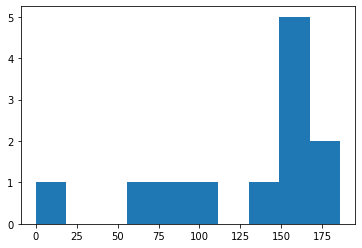

In [55]:
plt.hist(adoption_by_month['2020'])
print(st.normaltest(adoption_by_month['2020']))

NormaltestResult(statistic=24.253745253247878, pvalue=5.4121040252237996e-06)


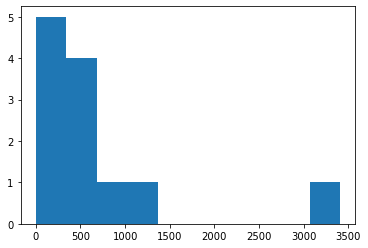

In [56]:
plt.hist(COVID_per_month['# of Cases'])
print(st.normaltest(COVID_per_month['# of Cases']))

In [57]:
adoption= "Dallas_adoption.csv"
Dallas_adoption= pd.read_csv(adoption)
Dallas_adoption
#adoption.shape
#Dallas_adoption.dtypes

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Tag Type,Activity Number,Activity Sequence,Source Id,Census Tract,...,Outcome Time,Receipt Number,Impound Number,Service Request Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year
0,A0144701,DOG,HAVANESE,VT 12,IMPOUNDED,NaN,NaN,1,P0098773,006301,...,11:31:00,R19-558731,K19-486742,NaN,APP SICK,SCAN CHIP,OVER THE COUNTER,RETURNED TO OWNER,NOV.2019,FY2020
1,A0442587,DOG,TERRIER MIX,FREEZER,IMPOUNDED,NaN,NaN,1,P0492284,007102,...,00:00:00,NaN,K19-486954,NaN,DEAD,SCAN CHIP,OVER THE COUNTER,NaN,NOV.2019,FY2020
2,A0458972,DOG,CATAHOULA,RECEIVING,UNAVAILABLE,NaN,A19-195601,1,P9991718,004600,...,13:36:00,NaN,K19-482022,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,SWEEP,NaN,OCT.2019,FY2020
3,A0525642,DOG,GERM SHEPHERD,INJD 001,IMPOUNDED,NaN,A19-196573,1,P0903792,016605,...,17:35:00,NaN,K19-483073,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,SWEEP,TAGGED,OCT.2019,FY2020
4,A0565586,DOG,SILKY TERRIER,LFD 119,UNAVAILABLE,NaN,NaN,1,P0890077,006900,...,12:57:00,R19-558750,K19-486694,NaN,APP WNL,SCAN CHIP,OVER THE COUNTER,RETURNED TO OWNER,NOV.2019,FY2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31913,A1108003,DOG,PIT BULL,QD 09,RELEASED FROM QUARANTINE,NaN,A20-237793,1,P0938311,031704,...,10:50:00,R20-571061,K20-513587,NaN,APP WNL,SCAN CHIP,FIELD,NaN,SEP.2020,FY2020
31914,A1107788,DOG,CHIHUAHUA SH,LFD 085,UNAVAILABLE,NaN,A20-237295,1,P0937967,000500,...,10:16:00,R20-571060,K20-513344,NaN,APP WNL,SCAN NO CHIP,FIELD,NaN,SEP.2020,FY2020
31915,A1088331,DOG,PIT BULL,DC 05,UNAVAILABLE,NaN,A20-236813,1,P0907761,000601,...,18:16:00,R20-571057,K20-513080,NaN,APP WNL,SCAN NO CHIP,FIELD,NaN,SEP.2020,FY2020
31916,A1106166,DOG,LABRADOR RETR,AD 060,PRE-LAB,NaN,NaN,1,P0544963,NaN,...,00:00:00,NaN,K20-513098,NaN,NaN,SCAN CHIP,OVER THE COUNTER,NaN,SEP.2020,FY2020


In [58]:
#Pulling out only the columns relevant for our research
Dallas_df= Dallas_adoption[['Animal Type',"Animal Breed","Outcome Type","Outcome Date"]]
Dallas_df

,Animal Type,Animal Breed,Outcome Type,Outcome Date
0,DOG,HAVANESE,RETURNED TO OWNER,11/09/2019
1,DOG,TERRIER MIX,DEAD ON ARRIVAL,11/10/2019
2,DOG,CATAHOULA,RETURNED TO OWNER,10/03/2019
3,DOG,GERM SHEPHERD,TRANSFER,10/15/2019
4,DOG,SILKY TERRIER,RETURNED TO OWNER,11/09/2019
...,...,...,...,...
31913,DOG,PIT BULL,RETURNED TO OWNER,10/07/2020
31914,DOG,CHIHUAHUA SH,RETURNED TO OWNER,10/07/2020
31915,DOG,PIT BULL,RETURNED TO OWNER,10/07/2020
31916,DOG,LABRADOR RETR,OTHER,NaN


In [59]:
Dallas_df['Outcome Date'] = pd.to_datetime(Dallas_df['Outcome Date'],format='%m/%d/%Y')
Dallas_df

,Animal Type,Animal Breed,Outcome Type,Outcome Date
0,DOG,HAVANESE,RETURNED TO OWNER,2019-11-09
1,DOG,TERRIER MIX,DEAD ON ARRIVAL,2019-11-10
2,DOG,CATAHOULA,RETURNED TO OWNER,2019-10-03
3,DOG,GERM SHEPHERD,TRANSFER,2019-10-15
4,DOG,SILKY TERRIER,RETURNED TO OWNER,2019-11-09
...,...,...,...,...
31913,DOG,PIT BULL,RETURNED TO OWNER,2020-10-07
31914,DOG,CHIHUAHUA SH,RETURNED TO OWNER,2020-10-07
31915,DOG,PIT BULL,RETURNED TO OWNER,2020-10-07
31916,DOG,LABRADOR RETR,OTHER,NaT


In [60]:
Dallas_df = Dallas_df.loc[Dallas_df['Outcome Type'] == 'ADOPTION']
Dallas_df

,Animal Type,Animal Breed,Outcome Type,Outcome Date
16,DOG,CHIHUAHUA SH,ADOPTION,2019-10-30
19,DOG,GERM SHEPHERD,ADOPTION,2019-11-20
23,DOG,LHASA APSO,ADOPTION,2019-11-03
25,DOG,BOXER,ADOPTION,2019-10-16
26,DOG,BOXER,ADOPTION,2019-11-16
...,...,...,...,...
31890,DOG,BLACK MOUTH CUR,ADOPTION,2020-10-06
31904,DOG,PIT BULL,ADOPTION,2020-10-07
31905,DOG,PIT BULL,ADOPTION,2020-10-07
31908,DOG,PIT BULL,ADOPTION,NaT


In [61]:
Dallas_df= Dallas_df.dropna()
Dallas_df['Outcome Month'] = Dallas_df['Outcome Date'].map(lambda x: x.strftime('%m'))
Dallas_df['Outcome Year'] = Dallas_df['Outcome Date'].map(lambda x: x.strftime('%Y'))
Dallas_df

,Animal Type,Animal Breed,Outcome Type,Outcome Date,Outcome Month,Outcome Year
16,DOG,CHIHUAHUA SH,ADOPTION,2019-10-30,10,2019
19,DOG,GERM SHEPHERD,ADOPTION,2019-11-20,11,2019
23,DOG,LHASA APSO,ADOPTION,2019-11-03,11,2019
25,DOG,BOXER,ADOPTION,2019-10-16,10,2019
26,DOG,BOXER,ADOPTION,2019-11-16,11,2019
...,...,...,...,...,...,...
31874,DOG,PIT BULL,ADOPTION,2020-10-05,10,2020
31875,DOG,BORDER COLLIE,ADOPTION,2020-10-06,10,2020
31890,DOG,BLACK MOUTH CUR,ADOPTION,2020-10-06,10,2020
31904,DOG,PIT BULL,ADOPTION,2020-10-07,10,2020


In [62]:
Dallas_2018 = Dallas_df.loc[Dallas_df['Outcome Year'] == '2018']
Dallas_2018_adoptions = Dallas_2018["Outcome Month"].value_counts()
Dallas_2018_adoptions

Series([], Name: Outcome Month, dtype: int64)

In [63]:
Dallas_2019 = Dallas_df.loc[Dallas_df['Outcome Year'] == '2019']
Dallas_2019_adoptions = Dallas_2019["Outcome Month"].value_counts()
Dallas_2019_adoptions

12    1419
11    1359
10     941
Name: Outcome Month, dtype: int64

In [64]:
Dallas_2020 = Dallas_df.loc[Dallas_df['Outcome Year'] == '2020']
Dallas_2020_adoptions = Dallas_2020["Outcome Month"].value_counts()
Dallas_2020_adoptions

01    1314
02    1140
03     922
08     606
06     550
07     546
09     530
05     405
04     292
10      63
Name: Outcome Month, dtype: int64

In [66]:
Dallas_by_month = pd.DataFrame({
    "2019": Dallas_2019_adoptions,
    "2020": Dallas_2020_adoptions
})
Dallas_by_month= Dallas_by_month.fillna(0)
Dallas_by_month

,2019,2020
01,0.0,1314.0
02,0.0,1140.0
03,0.0,922.0
04,0.0,292.0
05,0.0,405.0
06,0.0,550.0
07,0.0,546.0
08,0.0,606.0
09,0.0,530.0
10,941.0,63.0


In [ ]:
fig = plt.figure()
ax=fig.add_subplot(111)

ax.plot()
ax.plot(Dallas_by_month.index,Dallas_by_month["2019"],color="b", label='2019' )
ax.plot(Dallas_by_month.index,Dallas_by_month["2020"],color="g", label='2020')
#plt.plot(adoption_by_month['Year'],adoption_by_month['Number of Adoptions'],color="r", marker="o", markersize=7, linestyle="dashed", linewidth=1)

plt.xlabel('Month')
plt.ylabel('# of pets adopted')
plt.title("Year over Year Adoption Comparison")
#plt.legend(handles=('2018', '2019','2020'), loc="best")

plt.legend(loc="best",fontsize="small",fancybox=True)
plt.grid(True)
plt.show()

In [ ]:
plt.hist(Dallas_by_month['2020'])